<a href="https://colab.research.google.com/github/srv96/AI-ML-TensorFlow/blob/main/CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
cifar10 = tf.keras.datasets.cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()
X_train , X_test = X_train / 255.0 , X_test / 255.0
y_train , y_test = y_train.flatten() , y_test.flatten()

print("X_train.shape : ",X_train.shape)
print("y_train.shape : ",y_train.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
X_train.shape :  (50000, 32, 32, 3)
y_train.shape :  (50000,)


In [4]:
K = len(set(y_train))
print("number of classes : " , K)

number of classes :  10


In [5]:
i = tf.keras.layers.Input(shape=X_train[0].shape)
x = tf.keras.layers.Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = tf.keras.layers.Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = tf.keras.layers.Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(K, activation='softmax')(x)

model = tf.keras.Model(i, x)

In [6]:
model.compile(
    optimizer ='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [7]:
r = model.fit(
    X_train, y_train,
    validation_data = (X_test , y_test),
    epochs = 15
  )

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.3725 - loss: 1.7193 - val_accuracy: 0.5529 - val_loss: 1.2221
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5683 - loss: 1.2119 - val_accuracy: 0.6284 - val_loss: 1.0554
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6329 - loss: 1.0311 - val_accuracy: 0.6544 - val_loss: 0.9776
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6790 - loss: 0.9065 - val_accuracy: 0.6682 - val_loss: 0.9472
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7153 - loss: 0.8057 - val_accuracy: 0.6693 - val_loss: 0.9412
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7436 - loss: 0.7276 - val_accuracy: 0.6958 - val_loss: 0.8794
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7671 - loss: 0.6534 - val_accuracy: 0.6964 - val_loss: 0.8905
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7948 - loss: 0.5827 

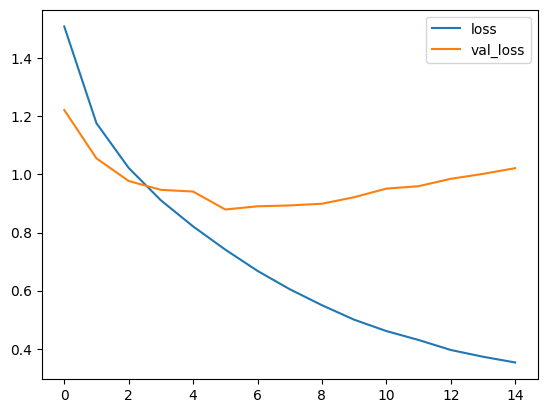

In [8]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

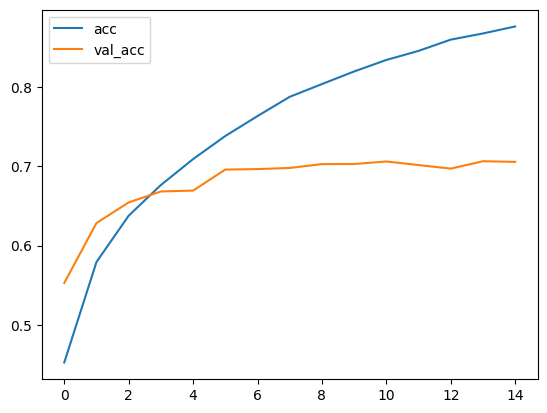

In [9]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Confusion matrix, without normalization
[[725  24  48  12  24   5  10  15  98  39]
 [ 17 858   4   6   5   7   6   5  25  67]
 [ 59   7 536  69 109  91  54  37  23  15]
 [ 21   9  53 486  88 203  59  44  18  19]
 [ 17   3  51  69 697  38  38  72  13   2]
 [ 15   2  36 159  56 633  27  48  12  12]
 [  4  13  27  59  60  41 766  10  11   9]
 [  8   3  35  35  73  62   4 768   3   9]
 [ 38  35   8  14  10   9   5   5 854  22]
 [ 32 118   7  23   7  16   7  17  41 732]]


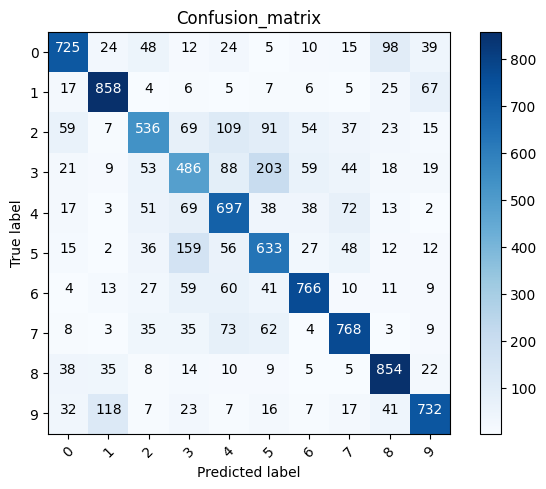

In [10]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion_matrix',
                          cmap=plt.cm.Blues):
    if normalize:
      cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
      print("Normalized confusion matrix")
    else:
      print("Confusion matrix, without normalization")
    print(cm)
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
      plt.text(j,i,format(cm[i,j],fmt),
              horizontalalignment="center",
              color="white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

In [11]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

Text(0.5, 1.0, 'True label: airplane Predicted: ship')

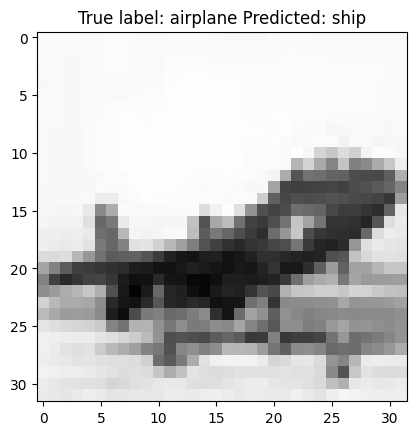

In [18]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(32, 32, 3))
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]],labels[p_test[i]]))